### 05_Inference
    Notebook to check similarity score for given set of images as pairs (both positive and negative) 

In [16]:
import sys
sys.path.append("../")

import random
import torch
import matplotlib.pyplot as plt
from PIL import Image
import os

from backbone.dataset import Face_Dataset

from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch import optim
import torch.nn as nn

In [3]:
from backbone.networks.inception_resnet_v1 import InceptionResnetV1

### Loading Trained Model

In [31]:
Siamese_network = InceptionResnetV1(pretrained='vggface2')
checkpoint = torch.load("../pretrained/20180402-114759-vggface2.pt")
Siamese_network.load_state_dict(checkpoint)
Siamese_network = Siamese_network.cuda()

### Generating a similar and dissimilar pair

In [38]:
with open("../files/couples/test.txt") as f:
    lines = f.readlines()
    
    while True:
        line = random.choice(lines)
        img1 = line.split(" ")[0]
        img2 = line.split(" ")[1]
        label = line.split(" ")[2][0]
        
        if label=="1":
            similar_pair = [img1,img2]
            break
            
    while True:
        line = random.choice(lines)
        img1 = line.split(" ")[0]
        img2 = line.split(" ")[1]
        label = line.split(" ")[2][0]
        
        if label=="0":
            dissimilar_pair = [img1,img2]
            break
            
print(similar_pair)
print(dissimilar_pair)

['Tony_Blair/Tony_Blair_0034.jpg', 'Tony_Blair/Tony_Blair_0098.jpg']
['Li_Peng/Li_Peng_0004.jpg', 'Pedro_Malan/Pedro_Malan_0001.jpg']


### Define similarity function

In [42]:
cos = nn.CosineSimilarity(dim=1, eps=1e-6)

### For a similar pair

Cosine_Similarity : 0.8747212886810303
Detected : similar


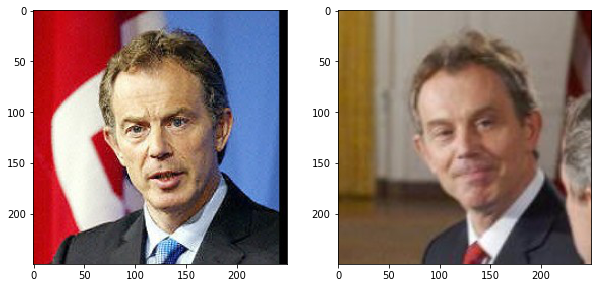

In [43]:
root_dir = "../lfw/"
img1_path = similar_pair[0]
img2_path = similar_pair[1]

img1 = Image.open(os.path.join(root_dir, img1_path))
img2 = Image.open(os.path.join(root_dir, img2_path))

T_img1 = transforms.ToTensor()(img1).unsqueeze(0).cuda()
T_img2 = transforms.ToTensor()(img2).unsqueeze(0).cuda()

embedding1 = Siamese_network(T_img1)
embedding2 = Siamese_network(T_img2)

cosine_similarity = cos(embedding1,embedding2).item()

similarity = "similar" if cosine_similarity>0.65 else "dissimilar"

print("Cosine_Similarity : {}".format(cosine_similarity))
print("Detected : {}".format(similarity))
fig = plt.figure(figsize=(10,10))
ax = []
ax.append(fig.add_subplot(1,2,1))
plt.imshow(img1)

ax.append(fig.add_subplot(1,2,2))
plt.imshow(img2)

plt.show()  

### For a dissimilar pair

Cosine_Similarity : 0.8696420192718506
Detected : similar


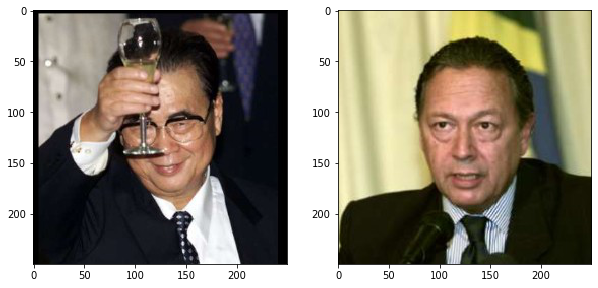

In [41]:
root_dir = "../lfw/"
img1_path = dissimilar_pair[0]
img2_path = dissimilar_pair[1]

img1 = Image.open(os.path.join(root_dir, img1_path))
img2 = Image.open(os.path.join(root_dir, img2_path))

T_img1 = transforms.ToTensor()(img1).unsqueeze(0).cuda()
T_img2 = transforms.ToTensor()(img2).unsqueeze(0).cuda()

embedding1 = Siamese_network(T_img1)
embedding2 = Siamese_network(T_img2)

cosine_similarity = cos(embedding1,embedding2).item()

similarity = "similar" if cosine_similarity>0.65 else "dissimilar"

print("Cosine_Similarity : {}".format(cosine_similarity))
print("Detected : {}".format(similarity))
fig = plt.figure(figsize=(10,10))
ax = []
ax.append(fig.add_subplot(1,2,1))
plt.imshow(img1)

ax.append(fig.add_subplot(1,2,2))
plt.imshow(img2)

plt.show()  